# Regularized Linear Regression and Bias vs. Variance

In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io #Used to load the OCTAVE *.mat files
import scipy.optimize #fmin_cg to train the linear regression

import warnings
warnings.filterwarnings('ignore')

## 1 Regularized Linear Regression

### 1.1 Visualizing the dataset
We will begin by visualizing the dataset containing historical records on the
change in the water level, $x$, and the amount of water owing out of the dam, $y$.
This dataset is divided into three parts: **Vamos trabalhar com um conjunto de dados com observacoes de nivel de agua e quantidade de agua saindo do cano. Os dados sao divididos em tres subgrupos como a imagem abaixo mostra.**
- A training set that your model will learn on: X, y
- A cross validation set for determining the regularization parameter:
Xval, yval
- A test set for evaluating performance. These are "unseen" examples
which your model did not see during training: Xtest, ytest

<img src="images/split.png" style="width:300px;height:150px;">

In [32]:
# Dados indicados a cada grupo abaixo, e grafico das observacoes do dataset.
datafile = 'data/ex5data1.mat'
mat = scipy.io.loadmat( datafile )
#Training set
X, y = mat['X'], mat['y']

#Cross validation set
Xval, yval = mat['Xval'], mat['yval']

#Test set
Xtest, ytest = mat['Xtest'], mat['ytest']
#Insert a column of 1's to all of the X's, as usual

X =     np.insert(X    ,0,1,axis=1)
Xval =  np.insert(Xval ,0,1,axis=1)
Xtest = np.insert(Xtest,0,1,axis=1)

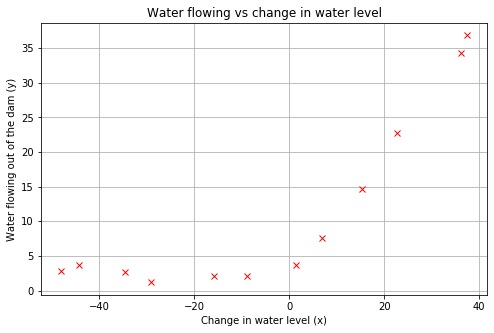

In [33]:
def plotData():
    plt.figure(figsize=(8,5))
    plt.ylabel('Water flowing out of the dam (y)')
    plt.xlabel('Change in water level (x)')
    plt.plot(X[:,1],y,'rx')
    plt.grid(True)
    plt.title("Water flowing vs change in water level")
    
plotData()

## 1.2 Regularized linear regression cost function

We are going to use the regularized linear regression with a regularization parameter $\lambda$ which controls the degree of regularization (thus, help preventing overtting). The regularization term puts a penalty on the overal cost $J$. As the magnitudes of the model parameters $\theta_j$ increase, the penalty increases as well. Note that you should not regularize the $\theta_0$ term.  **Vamos implementar regularizacao e para tal alguns Conceitos como overfitting, underfitting and desired cenario sao apresentados. A regularizacao insere um penalty no custo medio J.**

$$
J(\theta) := \frac{1}{2m}\left(\|\widehat{y} - y\|^2_2 +\lambda\|\theta\|_2^2\right).
$$

In statistics, `overfitting` is the production of an analysis that corresponds too closely or exactly to a particular set of data, and may therefore fail to fit additional data or predict future observations reliably.****


<img src="images/overfitting.png" style="width:600px;height:100px;">



In [34]:
initial_theta = np.ones((2,1))

def y_hat(X, theta): #Linear hypothesis function
    return np.dot(X,theta)

def computeCost(theta,X,y,lamb=0.): #Cost function
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    y is a matrix with m- rows and 1 column
    """
    m = len(y)
    h = y_hat(X,theta).reshape((m,1))
    mycost = float((1./(2*m)) * np.dot((h-y).T,(h-y)))
    regterm = float((lamb/(2*m)) * (np.dot(theta[1:].T,theta[1:])))
    return mycost + regterm

computeCost(initial_theta,X,y,lamb=1.)

303.9931922202643

## 1.3 Regularized linear regression gradient

Correspondingly, the partial derivative of regularized linear regression's cost
for $\theta_j$ is defined as **As derivadas parciais do custo de regularizacao deregressao linear sao definidas como:**

$$\frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m}\sum^m_{i=0}(\widehat{y}^{(i)}-y^{(i)})x^{(i)}_j, \quad\text{for}\quad j=0
$$

$$\frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m}\left(\sum^m_{i=0}(\widehat{y}^{(i)}-y^{(i)})x^{(i)}_j + \lambda\theta_j\right), \quad\text{for}\quad j>0
$$

In [35]:
def computeGradient(theta,X,y, lamb=0.):
    theta = theta.reshape((theta.shape[0],1))
    theta1 = theta.copy()
    theta1[0,0]=0
    m = len(y)
    grad = (1/m)*(np.dot(X.T,(y_hat(X, theta)-y))+lamb*theta1)
    return grad

def computeGradientFlattened(theta,X,y,lamb=0.):
    return computeGradient(theta,X,y,lamb=0.).flatten()

computeGradient(initial_theta,X,y,1.)

array([[-15.30301567],
       [598.25074417]])

## 1.4 Fitting linear regression

In this part, we set regularization parameter $\lambda$ to zero. Because our current implementation of linear regression is trying to fit a 2-dimensional $\theta$, regularization will not be incredibly helpful for a $\theta$ of such low dimension. In the later parts of the exercise, you will be using polynomial regression with regularization. **Aqui os parametros de regularizacao sao definidos como zero porque devido ao nosso banco de dados nao sera muito util. Na sequencia, vamos aplicar regressao polinomial (com mais de uma feature) e entao com regularizacao different e de zero.**

In this part we will run the algorithms [scipy.optimize.fmin_cg](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_cg.html) to compute the optimal values of $\theta$.

<img src="images/fmin_cg.png" style="width:400px;height:150px;">

In [36]:
def optimizeTheta(initial_theta, X, y, lamb=0.,print_output=True, maxiter=1000):
    theta = scipy.optimize.fmin_cg(computeCost,x0=initial_theta,\
                                       fprime=computeGradientFlattened,\
                                       args=(X,y,lamb),\
                                       disp=print_output,\
                                       epsilon=1.49e-12,\
                                       maxiter=maxiter)
    theta = theta.reshape((initial_theta.shape[0],1))
    return theta

In [37]:
Thetas = {}
for itera in [1, 10, 20]:
    Thetas[itera] = optimizeTheta(initial_theta,X,y,maxiter=itera)

         Current function value: 92.995776
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
         Current function value: 22.373907
         Iterations: 10
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 18
         Function evaluations: 28
         Gradient evaluations: 28


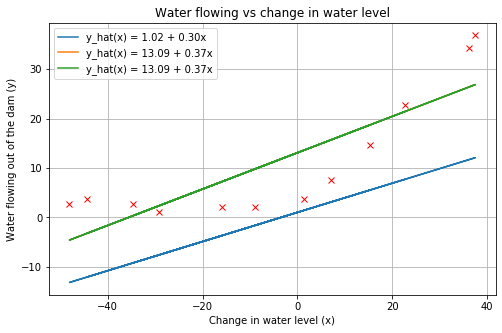

In [38]:
# Vamos apresentar o grafico de differente modelos.
plotData() 
for theta in Thetas.values():
    y_pred = y_hat(X, theta)
    plt.plot(X[:,1],y_pred, label = 
             'y_hat(x) = %0.2f + %0.2fx'%(theta.item(0),theta.item(1)))
    plt.legend()
        

* We reached the minino in the 18th iteration. We cannot have a better cost function than this using linear regression, we need another model. Do you have any idea what kind of function could best describe our data? **O minimo da funcao e encontrado na 18 iteracao. Vc consegue pensar em algum outro modelo que pode descrever melhor o conjunto de dados?**

## 2 Bias vs. variance

Models with high bias are not complex enough for the data and tend to underfit, while models with high variance overfit to the training data. **Modelos com bias nao sao complexos suficientes e tendem a apresentar undefitting e modelos com variancia tendem a fazer overfitting dos dados.**

### 2.1 Learning curves

A `learning curve` plots training and cross validation error as a function of training set size. The `learning curves` that will be useful in debugging learning algorithms. To plot the learning curve, we need a training and cross validation set error for difierent training set sizes. To obtain difierent training set sizes, you should use difierent subsets of the original training set X. In particular, the training error does not include the regularization term. One way to compute the training error is to use your existing cost function and set $\lambda=0$ only when using it to compute the training errorand cross validation error. **Curvas de aprendizagem: Bias e Variancia.**

<img src="images/bias_variance.png" style="width:400px;height:300px;">

- Bias (Underfit)

<center>$J_{\text{train}}(\theta)$ will be high and $J_{\text{train}}(\theta)\approx J_{\text{CV}}(\theta)$</center>
    
- Variance (Overfit)

<center>$J_{\text{train}}(\theta)$ will be low and $J_{\text{train}}(\theta)< J_{\text{CV}}(\theta)$</center>

In [39]:
# Vamos fazer os graficos das curvas de aprendizagem!!!!!
def plotLearningCurve(X_train, X_CV, y, lamb):
    """
    Loop over first training point, then first 2 training points, then first 3 ...
    and use each training-set-subset to find trained parameters.
    With those parameters, compute the cost on that subset (Jtrain)
    remembering that for Jtrain, lambda = 0 (even if you are using regularization).
    Then, use the trained parameters to compute Jval on the entire validation set
    again forcing lambda = 0 even if using regularization.
    Store the computed errors, error_train and error_val and plot them.
    """
    initial_theta = np.ones((X_train.shape[1], 1))
    mym, error_train, error_val = [], [], []
    for x in range(1,X_train.shape[0],1):
        train_subset = X_train[:x,:]
        y_subset = y[:x]
        mym.append(len(y_subset))
        fit_theta = optimizeTheta(initial_theta,train_subset,y_subset,lamb=lamb,print_output=False)
        error_train.append(computeCost(fit_theta,train_subset,y_subset,lamb=lamb))
        error_val.append(computeCost(fit_theta,X_CV,yval,lamb=0.))
        
    plt.figure(figsize=(8,5))
    plt.plot(mym,error_train,label='Train')
    plt.plot(mym,error_val,label='Cross Validation')
    plt.legend()
    plt.title('Learning curve')
    plt.xlabel('Number of training examples')
    plt.ylabel('Error')
    plt.grid(True)

* We can observe that `both` the train error and cross validation error are high when the number of training examples is increased. This reflects a high bias problem in the model, the linear regression model is too simple and is unable to fit our dataset well. In the next section, you will implement `polynomial regression` to fit a better model for this dataset. **Linear regression e muito simples e apresenta bias. Erro aumenta proporcionalmente ao aumento do numero de examplos no treino set.**

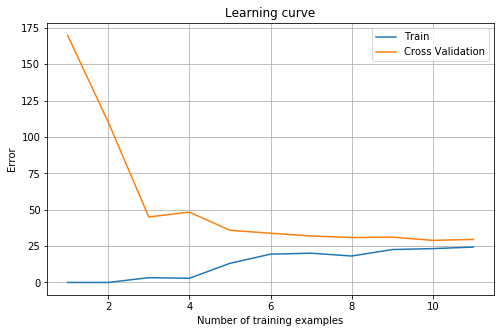

In [40]:
plotLearningCurve(X,Xval,y,0)

## 3 Polynomial regression

`Polynomial regression` is a form of regression analysis in which the relationship between the independent variable X and the dependent variable y is modelled as an nth degree polynomial in X.  **Vamos tentar polinomial regressao. O que signfica que temos mais de uma variavel explanatoria e a equacao de predicao e apresentada abaixo.**

For use polynomial regression, our hypothesis has the form:

$\widehat{y} = \theta_0 + \theta_1(\text{waterLevel}) + \theta_2(\text{waterLevel})^2 + ... + \theta_p(\text{waterLevel})^p$

In [41]:
def polyFeatures(X,p):
    """
    X is the matrix (with bias term already included as the first column)
    p is the degree of a polynomial
    Returns an X matrix with p+1 columns.
    The first additional column will be the 3th column squared,
    the next additional column will be the 4th column, etc.
    """
    X_poly = X.copy()
    for i in range(p-1):
        dim = i+2
        X_poly = np.insert(X_poly,X_poly.shape[1],np.power(X_poly[:,1],dim),axis=1)
    return X_poly


### 3.1 Learning Polynomial Regression


* Keep in mind that even though we have polynomial terms in our feature vector, we are still solving a linear regression optimization problem. The polynomial terms have simply turned into features that we can use for linear regression. We are using the same cost function and gradient that you wrote for the earlier part of this exercise.

* For this part of the exercise, you will be using a polynomial of degree 8. It turns out that if we run the training directly on the projected data, will not work well as the features would be badly scaled (e.g., an example with $x = 40$ will now have a feature $x^8 = 40^8 = 6.5\cdot10^{12}$). Therefore, you will need to use feature normalization. **Precisamos fazer a normalizacao de dados nesse exemplo, e aqui vamos fazer como fizemos da ultimo exemplo.**

$$
X_{\text{norm}} = \frac{X - \mu}{\sigma},
$$
where $\mu = \frac{1}{m}\sum^m_{i=0}x^{(i)}$ and $\sigma = \sqrt{\frac{\sum^m_{i=0}(x^{(i)}-\mu)^2}{m-1}}$.

In [42]:
# Funcao de normalizacao
def featureNormalize(X):
    """
    Takes as input the X array (with bias "1" first column), does
    feature normalizing on the columns (subtract mean, divide by standard deviation).
    """
   
    Xnorm = X.copy()
    stored_feature_means = np.mean(Xnorm,axis=0) #column-by-column
    Xnorm[:,1:] = Xnorm[:,1:] - stored_feature_means[1:]
    stored_feature_stds = np.std(Xnorm,axis=0,ddof=1)
    Xnorm[:,1:] = Xnorm[:,1:] / stored_feature_stds[1:]
    return Xnorm, stored_feature_means, stored_feature_stds

In [43]:
# Gerando mais variables, exponenciais...
# Generate an X matrix with terms up through x^8
# (7 additional columns to the X matrix)
X_poly = polyFeatures(X,8)
X_poly_norm, stored_means, stored_stds = featureNormalize(X_poly)
#Find fit parameters starting with 1's as the initial guess
initial_theta = np.ones((X_poly.shape[1],1))
fit_theta = optimizeTheta(initial_theta,X_poly_norm,y)

         Current function value: 0.029350
         Iterations: 1000
         Function evaluations: 1922
         Gradient evaluations: 1922


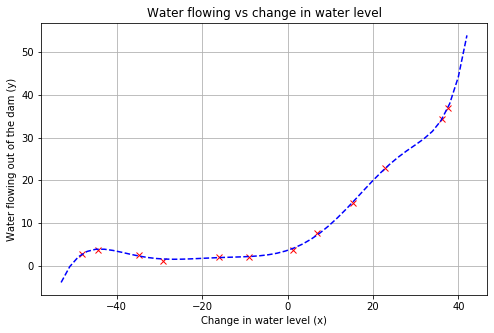

In [44]:
# Fazendo a implementacao do polinomio modelo e imprimindo o grafico com observacoes e modelo.
def plotFit(fit_theta, X):
    """
    Function that takes in some learned fit values (on feature-normalized data)
    It sets x-points as a linspace, constructs an appropriate X matrix,
    un-does previous feature normalization, computes the hypothesis values,
    and plots on top of data
    """
    n_points_to_plot = 4*X.shape[0]
    start = int(X[:,1].min()-5)
    stop = int(X[:,1].max()+5)
    xvals = np.linspace(start,stop,n_points_to_plot)
    xmat = np.ones((n_points_to_plot,1))
    
    xmat = np.insert(xmat,xmat.shape[1],xvals.T,axis=1)
    xmat = polyFeatures(xmat,len(fit_theta)-1)
    
    #This is undoing feature normalization
    means = featureNormalize(X)[1]
    stds = featureNormalize(X)[2]
    xmat[:,1:] = xmat[:,1:] - means[1:]
    xmat[:,1:] = xmat[:,1:] / stds[1:]
    plotData()
    plt.plot(xvals,y_hat(xmat, fit_theta),'b--')

plotFit(fit_theta,X_poly)

* One way to combat the overfitting (high-variance) problem is to add regularization to the model. In the next section, you will get to try diffierent parameters to see how regularization can lead to a better model. **Para evitar o overfitting, vamos adicionar o regularizacao!, abaixo um grafico  das curvas de aprendizagem: erro vs numero de exemplos.**

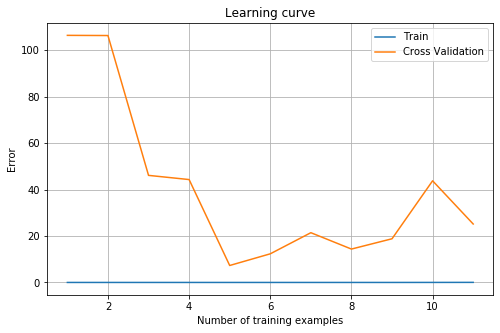

In [45]:
Xval_poly_norm = featureNormalize(polyFeatures(Xval,8))[0]

plotLearningCurve(X_poly_norm,Xval_poly_norm,y,0)

### 3.2 Adjusting the regularization parameter

* It is easy to note that from the last plot that we have overfitting. One way to combat the overfitting (high-variance) problem is to add regularization to the model. For $\lambda = 1$, you should see a polynomial fit that follows the data trend well and a learning curve showing that both the cross validation and training error converge to a relatively low value. This shows the For $\lambda = 1$ regularized polynomial regression model does not have the high-bias or high-variance. **Vamos introduzir a regularizacao e plotar o grafico novamente. Vamos utilizar lambda igual a 1. E plotar tambem as curvas de aprendizagem.**

         Current function value: 7.986820
         Iterations: 6
         Function evaluations: 52
         Gradient evaluations: 40


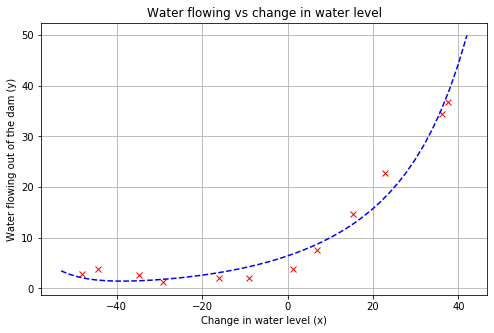

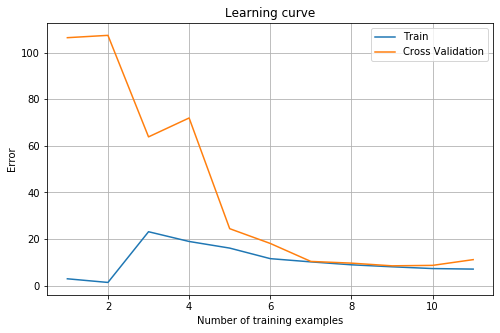

In [46]:
#Try Lambda = 1
initial_theta = np.zeros((X_poly_norm.shape[1],1))
fit_theta = optimizeTheta(initial_theta,X_poly_norm,y,1)
plotFit(fit_theta,X_poly)
plotLearningCurve(X_poly_norm,Xval_poly_norm,y,1)

         Current function value: 111.551067
         Iterations: 1
         Function evaluations: 42
         Gradient evaluations: 31


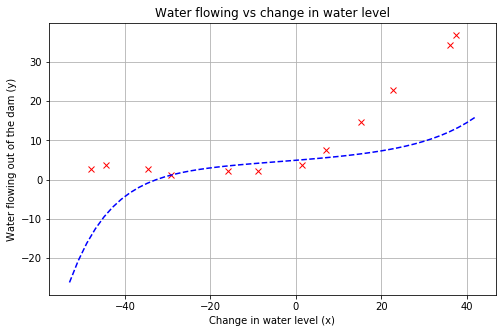

In [47]:
# Vamos tentar lambda igual a 50, e penalizando os coeficientes da equacao vamos plotar o grafico mais uma vez, 
# inclusive das curvas de aprendizagem.
# Try Lambda = 50
#Note after one iteration, the lambda of 50 penalizes the theta params so hard
#that the minimizer loses precision and gives up...
#so the plot below is NOT indicative of a successful fit
fit_theta = optimizeTheta(initial_theta,X_poly_norm,y,50)
plotFit(fit_theta,X_poly)

### 3.3 Selecting $\lambda$ using a cross validation set

In this section, you will implement an automated method to select the $\lambda$ parameter. Concretely, you will use a cross validation set to evaluate how good each $\lambda$ value is. After selecting the best $\lambda$ value using the cross validation set, we can then evaluate the model on the test set to estimate
how well the model will perform on actual unseen data. **Lambda para regularizacao pode ser escolhido pela cross-validation e nesse exemplo, podemos tentar diferentes possibilidades. Abaixo apos essa implementacao, vamos plotar lambda vs error!**

You should try $\lambda$ in the following range: $\{0; 0.001; 0.003; 0.01; 0.03; 0.1; 0.3; 1; 3; 10\}$.

In [48]:
lambdas = np.arange(0,10.5,0.5)
errors_train, errors_val = [], []
for lamb in lambdas:
    fit_theta = optimizeTheta(initial_theta,X_poly_norm,y,lamb,False)
    errors_train.append(computeCost(fit_theta,X_poly_norm,y,lamb=lamb))
    errors_val.append(computeCost(fit_theta,Xval_poly_norm,yval,lamb=lamb))

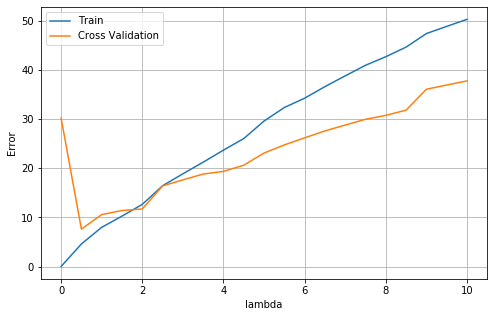

In [49]:
plt.figure(figsize=(8,5))
plt.plot(lambdas,errors_train,label='Train')
plt.plot(lambdas,errors_val,label='Cross Validation')
plt.legend()
plt.xlabel('lambda')
plt.ylabel('Error')
plt.grid(True)

In [54]:
# Checando qual melhor lambda
# Calculamos a differenca entre os valores referentes ao erro do treino e validacao, entao, 
# Verificamos qual a menor diferenca entre esses erros e multimplicamos por 0.5 
# 0.5 e justificado (que eh o intervalo entre cada lambda testado)
diff = [abs(j-i) for i, j in zip(errors_train, errors_val)]
diff_index = diff.index(min(diff))
best_lamb = 0.5*(diff_index)
best_lamb

2.5

In this figure, we can see that the best value of $\lambda$ is 2.5. Due to randomness in the training and validation splits of the dataset, the cross validation error can sometimes be lower than the training error. For this optional (ungraded) exercise, you should compute the test error using the best value of $\lambda$ you found. 

In [55]:
# Entao rodamos tudo novamente com o melhor lambda e plotarmos o modelo e dados abaixo!!!!!!!!
Xtest
Xtest_poly = polyFeatures(Xtest,8)
Xtest_poly_norm = featureNormalize(Xtest_poly)[0]

initial_theta = np.ones((Xtest_poly.shape[1],1))
fit_theta = optimizeTheta(initial_theta,Xtest_poly_norm,ytest, 2.5)

         Current function value: 11.724431
         Iterations: 6
         Function evaluations: 106
         Gradient evaluations: 94


Text(0.5, 1.0, 'Text Set')

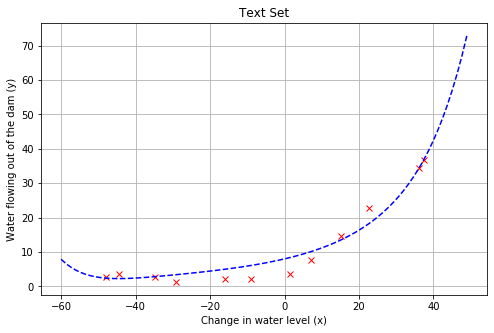

In [56]:
plotFit(fit_theta,Xtest_poly)
plt.title("Text Set")

Bibliography

- https://github.com/kaleko/CourseraML

- https://dziganto.github.io/cross-validation/data%20science/machine%20learning/model%20tuning/python/Model-Tuning-with-Validation-and-Cross-Validation/

- https://medium.com/greyatom/what-is-underfitting-and-overfitting-in-machine-learning-and-how-to-deal-with-it-6803a989c76